# Titanic Survival Prediction Using Classification Models
by Adiro Pradaya Gahana

-----

DISCLAIMER
This notebook is a copy and with small modifications of the *Titanic Project Example* by Ken Jee. I don't copy and edit on the original notebook directly because I want to practice writing from scratch. The original notebook is linked below <br>
https://www.kaggle.com/code/kenjee/titanic-project-example/notebook

The work done here will only be done until model comparisons. Tuning for better results will be done in the future

-----

The Titanic dataset has been one of, if not, the most popular dataset for people starting out as a data scientist. I myself just started my data science journey and was introduced to the titanic dataset through a data science course that I joined. In this notebook, I will be attempting to reproduce an end-to-end data science project, from data understanding to model building and testing. 

As mentioned before, this is a modification from Ken Jee's work, but I try my best to add other insights and experiments. I just started learning so any constructive criticism will be much appreciated.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

We read the data, add columns to differenciate between train and test data, add a column for the test data of Survival status, then concatenate both the training and testing to make all_data dataframe

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data_train['train_test'] = 1
data_test['train_test'] = 0
data_test['Survived'] = np.NaN
all_data = pd.concat([data_train, data_test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## Planning

The rough outline of what I will be doing is listed below:
- Understand data nature using .info() and .describe()
- Make histograms and boxplot for numeric data
- Make value_counts() for categorical data
- Search for correlation between the metrics
- Explore interesting themes
    - Does the wealthy survive? (higher ticket fare or title in name)
    - Survival based on cabin location?
    - Young and wealthy? (age and ticket price scatterplot)
    - Young and female? (based on the movie if I remember correctly, the first allow the women and children for evacuation)
- Feature engineering
- Preprocess (encoding, scaling(if needed))

- Model Building (baseline, comparison, tuning)

## Data Understanding

Data nature, histograms for numeric data, value counts for categorical data

In [3]:
data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Small number of null values in Age and Embarked. Many null values in Cabin

In [5]:
# Separating numeric and categorical data
df_num = data_train[['Age','SibSp','Parch', 'Fare']]
df_cat = data_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


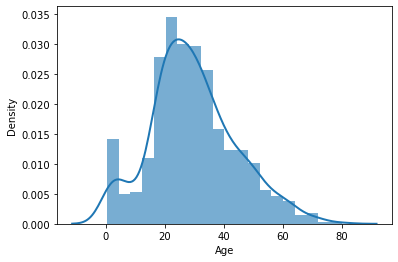

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


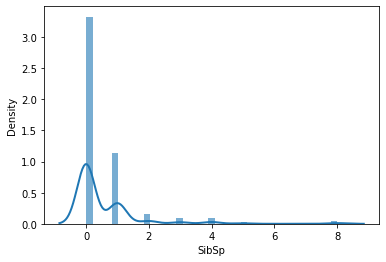

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


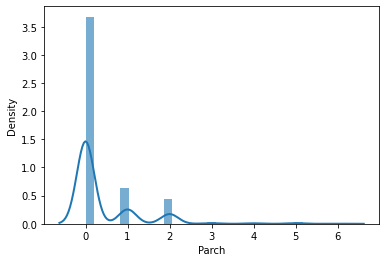

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


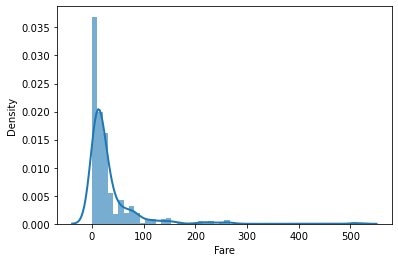

In [9]:
# Plot distributions for all numerical data

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

for i in df_num.columns:
    plt.figure()
    sns.distplot(df_num[i], label=str(i), **kwargs)
    plt.show()
#     plt.hist(df_num[i])
#     plt.title(i)
#     plt.show()

Age follows a fairly normal distribution little skewed.<br>
SibSp, Parch, and Fare does not. <br>
Fare follows an exponential distribution 

CONSIDER normalization and scaling for non-normal distributions

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

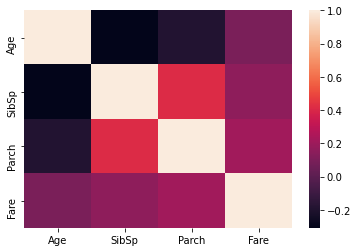

In [10]:
# Look for correlations using heatmap plot
# note: correlations is most important for regression problems. Observe to avoid multicolinearity (variables that 
#   correlates to high that it gives overwhelming effect to the model)


print(df_num.corr())
sns.heatmap(df_num.corr())

Insight: Parch and SibSp have quite a strong connection. People with siblings and parents/spouses. This can probably mean people with siblings are children and travel with their parents. Families tend to travel together

In [11]:
# Survived people accross age, sibsp, parch, and fare (average)
pd.pivot_table(data_train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Insight:
- Average age of people that survived is around 28 years old
- Higher fare, higher survival rate
- With parents/children, higher survival rates

CONSIDER:
- Differenciate children from adults for feature engineering

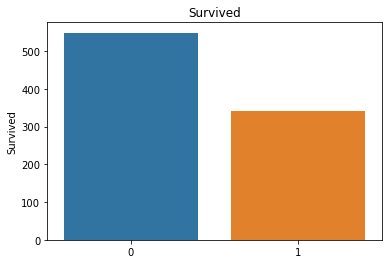

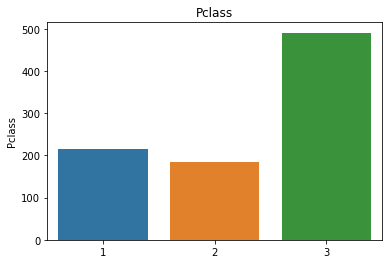

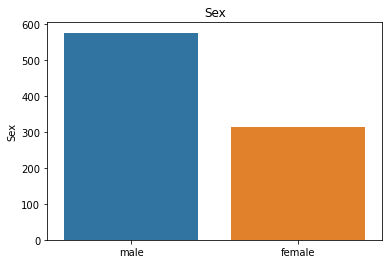

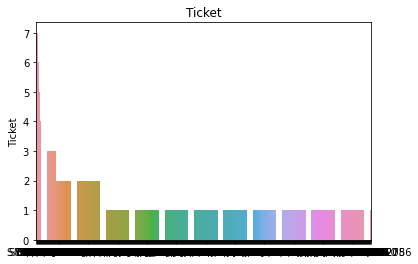

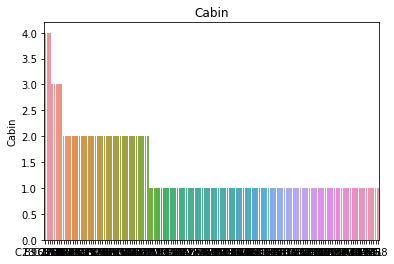

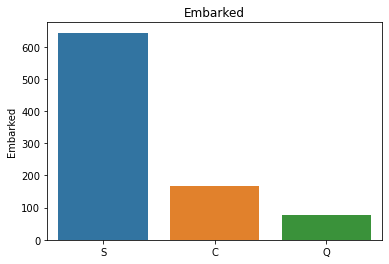

In [12]:
# Value counts for categorical data

for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()

CONSIDER feature engineering for Ticket and Cabin data (very messy, too many categories)

In [13]:
# Survival rate with each category
#  In original notebook, Ken uses pivot_table(). I use crosstab() because normalization isnt available for pivot_table() 

print(pd.crosstab(data_train['Survived'], data_train['Pclass'], normalize='columns'))
print('---')

print(pd.crosstab(data_train['Survived'], data_train['Sex'], normalize='columns'))
print('---')

print(pd.crosstab(data_train['Survived'], data_train['Embarked'], normalize='columns'))
print('---')

Pclass          1         2         3
Survived                             
0         0.37037  0.527174  0.757637
1         0.62963  0.472826  0.242363
---
Sex         female      male
Survived                    
0         0.257962  0.811092
1         0.742038  0.188908
---
Embarked         C        Q         S
Survived                             
0         0.446429  0.61039  0.663043
1         0.553571  0.38961  0.336957
---


Insight: 
- First class has higher survival rate (62%) than 2nd and 3rd class
- 3rd class has low survival rate (24%)
- 74% of female survived where 81% of male didn't (very high difference)

## Feature Engineering

1. Cabin - Make new category based on letters on the cabin code
2. Ticket - Separate and find difference between numeric and non-numeric tickets
3. Person name - Make new variable for person's title. Make new variable for if_children flag (new).

In [11]:
# Some people use multiple cabins. Make new category for number of cabins used per person. 0 if nan
data_train['num_of_cabins'] = data_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))
data_train['num_of_cabins'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: num_of_cabins, dtype: int64

In [12]:
pd.pivot_table(data_train, index = 'Survived', columns = 'num_of_cabins', values = 'Ticket' ,aggfunc ='count')

num_of_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [13]:
# Survival rate based on number of cabins
pd.crosstab(data_train['Survived'], data_train['num_of_cabins'], normalize='columns')

num_of_cabins,0,1,2,3,4
Survived,,,,,
0,0.700146,0.322222,0.4375,0.5,0.0
1,0.299854,0.677778,0.5625,0.5,1.0


In [14]:
# make new category for first letter in the cabin code. n for nan
#   From research, the letter is the deck code

data_train['deck'] = data_train.Cabin.apply(lambda x: str(x)[0])
data_train['deck'].value_counts()

# Survival based on deck location (pivot table)
pd.pivot_table(data_train, index = 'Survived', columns = 'deck', values = 'Ticket' ,aggfunc ='count')

deck,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [15]:
# Numeric vs non-numeric tickets

data_train['ticket_num'] = data_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data_train['ticket_num'].value_counts()

data_train['ticket_letter'] = data_train.Ticket.apply(lambda x: ' '.join(x.split(' ')[:-1]).replace('/','').replace('.','').lower() if len(x.split(' ')[:-1])>0 else 0)
data_train['ticket_letter'].value_counts() # to see the value counts

0             665
pc             60
ca             41
a5             21
sotonoq        15
stono 2        12
scparis        11
wc             10
a4              7
stono2          6
soc             6
c               5
fcc             5
sopp            3
pp              3
wep             3
ppp             2
sotono2         2
scah            2
swpp            2
fc              1
casoton         1
as              1
sca4            1
sc              1
sp              1
fa              1
scah basle      1
scow            1
sop             1
Name: ticket_letter, dtype: int64

In [16]:
# Survival based on ticket letter (pivot table)
pd.pivot_table(data_train, index='Survived', columns='ticket_letter', values='Ticket', aggfunc='count')

ticket_letter,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,sop,sopp,sotono2,sotonoq,sp,stono 2,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,1.0,3.0,2.0,13.0,1.0,7.0,3.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,2.0,NaN,5.0,3.0,2.0,1.0,1.0


In [17]:
# New category for person's title

data_train['name_title'] = data_train.Name.apply(lambda x: x.split(', ')[1].split('. ')[0].lower())
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,num_of_cabins,deck,ticket_num,ticket_letter,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,mr


In [18]:
data_train['name_title'].value_counts()

mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
mlle              2
major             2
col               2
the countess      1
lady              1
jonkheer          1
ms                1
sir               1
capt              1
mme               1
don               1
Name: name_title, dtype: int64

In [19]:
pd.crosstab(data_train['Survived'], data_train['name_title'])

name_title,capt,col,don,dr,jonkheer,lady,major,master,miss,mlle,mme,mr,mrs,ms,rev,sir,the countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [20]:
# New category for children (under 18 years old)

data_train['is_children'] = np.where(data_train['Age']<18, 1, 0)
pd.crosstab(data_train['Survived'], data_train['is_children'], normalize='columns')

is_children,0,1
Survived,,
0,0.638817,0.460177
1,0.361183,0.539823


## Data Preprocessing

1. Make all new categories previously made in training data to all data
2. Drop null values in Embarked (only 2)
3. Impute null values in Age
4. Normalize Fare using logarithm 
5. Encoding for all categorical data
6. Include only relevant variables
7. Scale data

In [44]:
# New categories for all data
all_data['num_of_cabins'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else str(len(x.split(" "))))
all_data['deck'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['ticket_num'] = all_data.Ticket.apply(lambda x: 'Yes' if x.isnumeric() else 'No')
all_data['ticket_letter'] = all_data.Ticket.apply(lambda x: ' '.join(x.split(' ')[:-1]).replace('/','').replace('.','').lower() if len(x.split(' ')[:-1])>0 else 'noletter')
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(', ')[1].split('. ')[0].lower())
all_data['is_children'] = np.where(all_data['Age']<18, 'Yes', 'No')

# Drop null values in Embarked
all_data.dropna(subset=['Embarked'], inplace=True)

# Impute null values in Age (using mean)
all_data.Age = all_data.Age.fillna(data_train.Age.mean())

# Normalize Fare using logarithm
all_data['norm_fare'] = np.log(all_data.Fare+1)
#all_data['norm_fare'].hist()

# Normalize SibSp and Parch (not used)
# all_data['norm_SibSp'] = np.log(all_data.SibSp+1)
# all_data['norm_Parch'] = np.log(all_data.Parch+1)

# Encoding for all categorical data (Still Error. For now use dummy table)
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# col = sorted(all_data['Sex'].unique().tolist()) + sorted(all_data['Embarked'].unique().tolist()) + sorted(all_data['deck'].unique().tolist() + sorted(all_data['ticket_num'].unique().tolist() + sorted(all_data['ticket_letter'].unique().tolist() + sorted(all_data['name_title'].unique().tolist() + sorted(all_data['is_children'].unique().tolist())
# enc_data_cat = pd.DataFrame(enc.fit_transform(all_data[['Sex', 'Embarked', 'deck','ticket_num','ticket_letter','name_title','is_children']]).toarray(), columns=col)

# Categorical transform on all data
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','deck','num_of_cabins','ticket_num', 'ticket_letter','name_title','is_children','train_test']])
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [46]:
# Make new data frame for scaled data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [47]:
X_train.head()

,Pclass,Age,SibSp,Parch,norm_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,name_title_mlle,name_title_mme,name_title_mr,name_title_mrs,name_title_ms,name_title_rev,name_title_sir,name_title_the countess,is_children_No,is_children_Yes
0,3,22.0,1,0,2.110213,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,38.0,1,0,4.280593,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,26.0,0,0,2.188856,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,3.990834,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,3,35.0,0,0,2.202765,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [48]:
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,norm_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,name_title_mlle,name_title_mme,name_title_mr,name_title_mrs,name_title_ms,name_title_rev,name_title_sir,name_title_the countess,is_children_No,is_children_Yes
0,3,-0.580261,0.480272,-0.445407,-0.896199,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,0.662297,0.480272,-0.445407,1.347196,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,-0.269621,-0.479537,-0.445407,-0.814910,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0.429318,0.480272,-0.445407,1.047689,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,3,0.429318,-0.479537,-0.445407,-0.800534,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## Model Building

For baseline, use Naive-Bayes <br>
Baseline will be compared to other popular classification algorithms:
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Support Vector Machines

Model performance will be scored by cross validation score.
The results for these will only be a reference for tuning in the next sub-part.

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [52]:
# Baseline
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print()
print("Naive Bayes results a mean score of %0.2f" %cv.mean())

[0.71348315 0.7247191  0.43258427 0.43820225 0.44632768]

Naive Bayes results a mean score of 0.55


Next we will use other algorithms

In [54]:
# Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print("Logistic Regression results a mean score of %0.2f" %cv.mean())
print()

# K-Nearest Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print("KNN results a mean score of %0.2f" %cv.mean())
print()

# Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print("Decision Tree results a mean score of %0.2f" %cv.mean())
print()

# Support Vector
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print("Support Vector results a mean score of %0.2f" %cv.mean())

[0.80337079 0.82022472 0.79213483 0.80337079 0.85875706]
Logistic Regression results a mean score of 0.82

[0.75842697 0.7752809  0.76404494 0.83146067 0.83615819]
KNN results a mean score of 0.79

[0.76404494 0.79775281 0.81460674 0.76404494 0.8079096 ]
Decision Tree results a mean score of 0.79

[0.84269663 0.8258427  0.8258427  0.79775281 0.85310734]
Support Vector results a mean score of 0.83


In [57]:
'''
Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 
1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
A "soft" classifier averages the confidence of each of the models. 
If a the average confidence is > 50% that it is a 1 it will be counted as such

'''

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('gnb',gnb),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print("Voting Classifier results a mean score of %0.2f" %cv.mean())

[0.79213483 0.80898876 0.79213483 0.80337079 0.8700565 ]
Voting Classifier results a mean score of 0.81


In [65]:
X_test_scaled.norm_fare = X_test_scaled.norm_fare.fillna(X_train_scaled.norm_fare.mean())
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pclass                    418 non-null    int64  
 1   Age                       418 non-null    float64
 2   SibSp                     418 non-null    float64
 3   Parch                     418 non-null    float64
 4   norm_fare                 418 non-null    float64
 5   Sex_female                418 non-null    uint8  
 6   Sex_male                  418 non-null    uint8  
 7   Embarked_C                418 non-null    uint8  
 8   Embarked_Q                418 non-null    uint8  
 9   Embarked_S                418 non-null    uint8  
 10  deck_A                    418 non-null    uint8  
 11  deck_B                    418 non-null    uint8  
 12  deck_C                    418 non-null    uint8  
 13  deck_D                    418 non-null    uint8  
 14  deck_E    

In [67]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)

basic_submission = {'PassengerId': data_test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

After submitting on the Kaggle Competition page, the result gives a public score of 0.74641 <br>
Of course, I will try my best improve on this by experimenting more in the future. 

Any advices you can give would mean a lot<br>
Thankyou for reading!